In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")
sns.set_style("ticks")
#plt.style.use([u'fivethirtyeight',])

from joblib import load, dump
from IPython.display import display, HTML

In [2]:
MODEL_VERSION = "v4"
MODEL_SUFFIX = "%s.first_author" % MODEL_VERSION
GENDERS = ["-", "F", "M"]
GENDERS = ["UNKNOWN", "FEMALE", "MALE"]
TOP_15_ETHNICITIES = ["ENGLISH", "GERMAN", "HISPANIC", "CHINESE",
                      "JAPANESE", "SLAV", "FRENCH", "ITALIAN", "INDIAN",
                      "NORDIC", "ARAB", "DUTCH", "KOREAN", "UNKNOWN", "OTHER"]
TOP_15_COUNTRIES = ["USA", "UNKNOWN", "UK", "JAPAN", "GERMANY", "FRANCE", "ITALY",
                    "CANADA", "CHINA", "AUSTRALIA", "SPAIN", "NETHERLANDS",
                    "SWEDEN", "INDIA", "OTHER"]

In [3]:
#results_full = load("results_all_model/v2/results_all_model.v2.pkl")
results_full = load("results_all_model/%s/results_all_model_intercept.%s.pkl" % (MODEL_VERSION, MODEL_SUFFIX))

In [4]:
TOP_FEATURES = map(lambda x: x[0][0], results_full)
TOP_FEATURES

['Intercept',
 'SinkCites',
 'AuthorAge',
 'PubType',
 'YearSpan',
 'Journal',
 'SourceCites',
 'Affiliation',
 'VolumeNovelty',
 'Language',
 'SourceAuthors',
 'Ethnicity',
 'MeshCounts',
 'Gender']

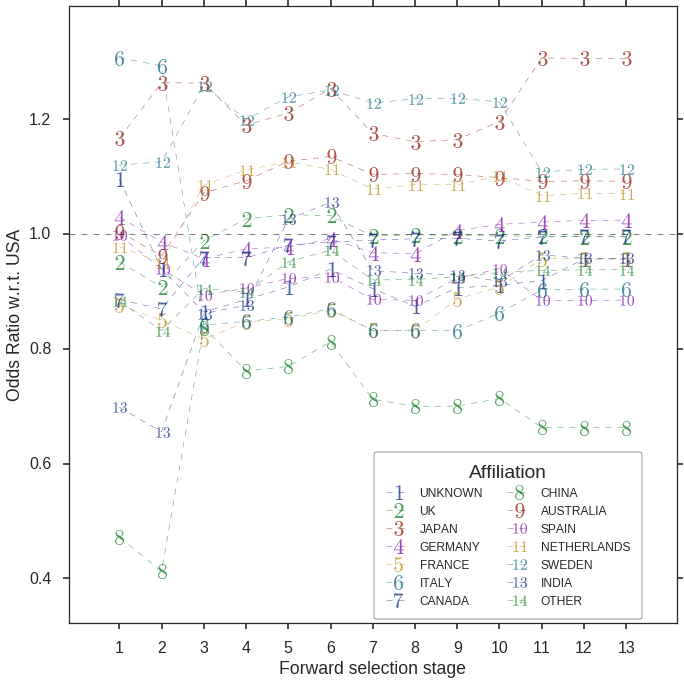

In [5]:
fig, ax = plt.subplots(1,1, sharex=True, figsize=(10,10))
plot_data = pd.DataFrame()
stages = []
title = "Affiliation"
for i, res in enumerate(results_full[1:]):
    #print "\nStage %s: " % i
    stages.append("Stage %s: %s" % (i+1, TOP_FEATURES[i]))
    found = False
    for k, (m, s) in res:
        if k == "Affiliation":
            plot_data["Stage %s" % i] = s.tables[1].ix[s.tables[1].index.str.startswith("C(source_country"), "Coef."]
            found = True
    if not found:
        k, (m,s) = res[0]
        plot_data["Stage %s" % i] = s.tables[1].ix[s.tables[1].index.str.startswith("C(source_country"), "Coef."]
        
colors = sns.color_palette("dark", plot_data.shape[0])
for i, (idx, l) in enumerate(zip(plot_data.index, TOP_15_COUNTRIES[1:])):
    #ax.plot(plot_data.ix[idx].values, label=l, color=colors[i], marker="$%s$" % (i+1), lw=1)
    ax.plot(np.exp(plot_data.ix[idx].values),
            label=l, color=colors[i],
            marker="$%s$" % (i+1), ms=15,
            linestyle="--", lw=0.5, alpha=0.7)
#ax.axhline(y=0, linestyle="--", lw=0.5)
ax.axhline(y=1, linestyle="--", lw=0.5, color="black")
#ax.set_ylabel("Coefficient in model")
ax.set_ylabel("Odds Ratio w.r.t. %s" % TOP_15_COUNTRIES[0])
ax.set_xticks(range(plot_data.shape[1]))
ax.set_xticklabels(range(1, plot_data.shape[1] + 1))
ax.set_xlabel("Forward selection stage")
fig.tight_layout()
lgd = fig.legend(*ax.get_legend_handles_labels(), loc="upper right", 
                 bbox_to_anchor=(0.9,0.33), ncol=2,
                 frameon=True, fancybox=True,
                 borderpad=1, prop={"size": 12},
                title = title)
plt.margins(x=0.1, y=0.1)
plt.savefig("Affiliation_coeffs.%s.pdf" % MODEL_SUFFIX, bbox_inches="tight", bbox_extra_artists=[lgd])
plot_data["Feature_Name"] = TOP_15_COUNTRIES[1:]
#plot_data

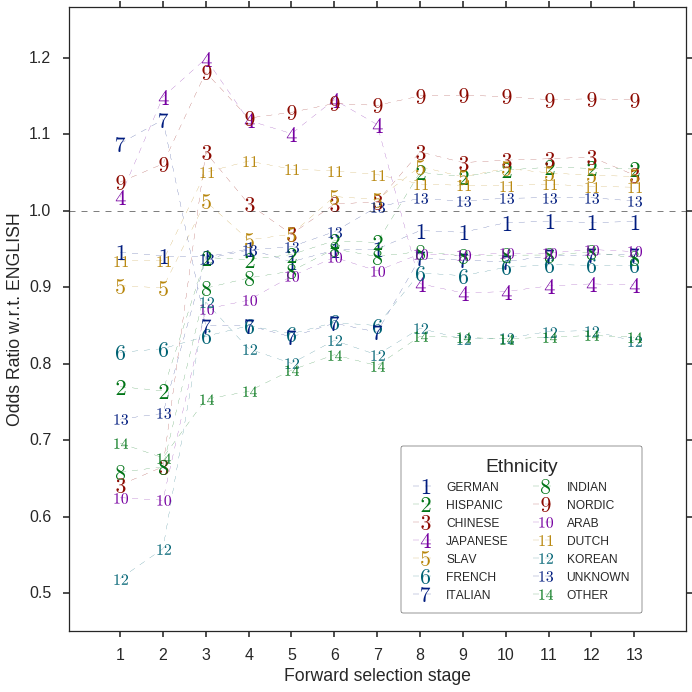

In [6]:
fig, ax = plt.subplots(1,1, sharex=True, figsize=(10,10))
plot_data = pd.DataFrame()
stages = []
title = "Ethnicity"
for i, res in enumerate(results_full[1:]):
    #print "\nStage %s: " % i
    stages.append("Stage %s: %s" % (i+1, TOP_FEATURES[i]))
    found = False
    for k, (m, s) in res:
        if k == "Ethnicity":         
            plot_data["Stage %s" % i] = s.tables[1].ix[s.tables[1].index.str.startswith("mf.MC(eth1"), "Coef."]
            found = True
    if not found:
        k, (m,s) = res[0]        
        plot_data["Stage %s" % i] = s.tables[1].ix[s.tables[1].index.str.startswith("mf.MC(eth1"), "Coef."]
        
colors = sns.color_palette("dark", plot_data.shape[0])
for i, (idx, l) in enumerate(zip(plot_data.index, TOP_15_ETHNICITIES[1:])):
    #ax.plot(plot_data.ix[idx].values, label=l, color=colors[i], marker="$%s$" % (i+1), lw=1)
    ax.plot(np.exp(plot_data.ix[idx].values),
            label=l, color=colors[i],
            marker="$%s$" % (i+1), ms=15,
            linestyle="--", lw=0.2)

#ax.axhline(y=0, linestyle="--", lw=0.5)
ax.axhline(y=1, linestyle="--", lw=0.5, color="black")
#ax.set_ylabel("Coefficient in model")
ax.set_ylabel("Odds Ratio w.r.t. %s" % TOP_15_ETHNICITIES[0])
ax.set_xticks(range(plot_data.shape[1]))
ax.set_xticklabels(range(1, plot_data.shape[1] + 1))
ax.set_xlabel("Forward selection stage")

plt.margins(x=0.1, y=0.1)
fig.tight_layout()
lgd = fig.legend(*ax.get_legend_handles_labels(), loc="upper right", 
                 bbox_to_anchor=(0.9,0.35), ncol=2,
                 frameon=True, fancybox=True,
                 borderpad=1, prop={"size": 12},
                title = title)
plt.savefig("Ethnicity_coeffs.%s.pdf" % MODEL_SUFFIX, bbox_inches="tight", bbox_extra_artists=[lgd])
plot_data["Feature_Name"] = TOP_15_ETHNICITIES[1:]
#plot_data

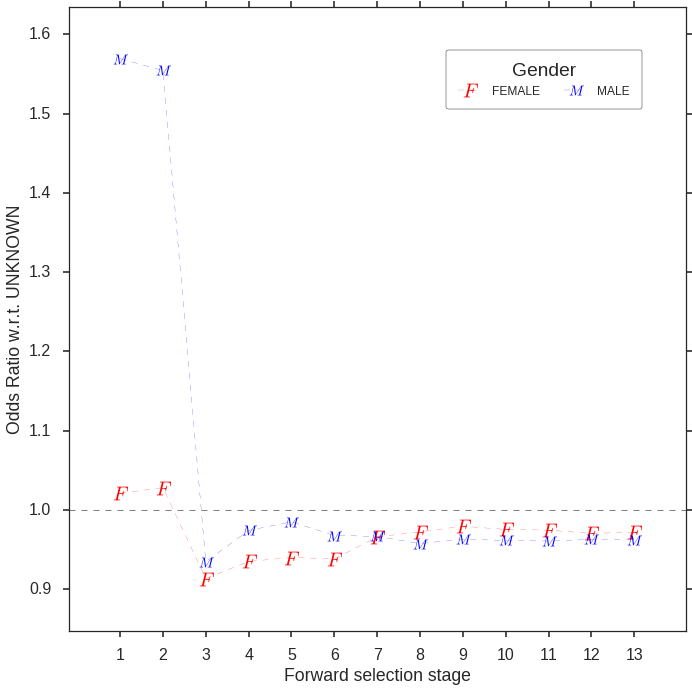

In [7]:
fig, ax = plt.subplots(1,1, sharex=True, figsize=(10,10))
plot_data = pd.DataFrame()
stages = []
title = "Gender"
for i, res in enumerate(results_full[1:]):
    #print "\nStage %s: " % i
    stages.append("Stage %s: %s" % (i+1, TOP_FEATURES[i]))
    found = False
    for k, (m, s) in res:
        if k == "Gender":
            plot_data["Stage %s" % i] = s.tables[1].ix[s.tables[1].index.str.startswith("C(gender"), "Coef."]
            found = True
    if not found:
        k, (m,s) = res[0]        
        plot_data["Stage %s" % i] = s.tables[1].ix[s.tables[1].index.str.startswith("C(gender"), "Coef."]
        
colors = sns.color_palette("dark", plot_data.shape[0])
colors = ["red", "blue"]
for i, (idx, l) in enumerate(zip(plot_data.index, GENDERS[1:])):
    #ax.plot(plot_data.ix[idx].values, label=l, color=colors[i], marker="$%s$" % (i+1), lw=1)
    ax.plot(np.exp(plot_data.ix[idx].values),
            label=l, color=colors[i],
            marker="$%s$" % (l[0]), ms=15,
            linestyle="--", lw=0.2)

#ax.axhline(y=0, linestyle="--", lw=0.5)
ax.axhline(y=1, linestyle="--", lw=0.5, color="black")
#ax.set_ylabel("Coefficient in model")
ax.set_ylabel("Odds Ratio w.r.t. %s" % GENDERS[0])
ax.set_xticks(range(plot_data.shape[1]))
ax.set_xticklabels(range(1, plot_data.shape[1] + 1))
ax.set_xlabel("Forward selection stage")

plt.margins(x=0.1, y=0.1)
fig.tight_layout()
lgd = fig.legend(*ax.get_legend_handles_labels(), loc="upper right", 
                 bbox_to_anchor=(0.9,0.9), ncol=2,
                 frameon=True, fancybox=True,
                 borderpad=1, prop={"size": 12},
                title = title)
plt.savefig("Gender_coeffs.%s.pdf" % MODEL_SUFFIX, bbox_inches="tight", bbox_extra_artists=[lgd])

In [8]:
print "Final Model"
results_full[-1][0][1][1]

Final Model


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                    Results: Logit
======================================================================================================================
Model:                                Logit                            Pseudo R-squared:                 0.211        
Dependent Variable:                   is_self_cite                     AIC:                              12747067.8340
Date:                                 2016-06-12 14:02                 BIC:                              12748155.9177
No. Observations:                     41618369                         Log-Likelihood:                   -6.3735e+06  
Df Model:                             69                               LL-Null:                          -8.0787e+06  
Df Residuals:                         41618299                         LLR p-value:                      0.0000       
Converged:                            1.0000                           Scale:                            1.0000       
No. Iterations:                       10.0000                                                                         
----------------------------------------------------------------------------------------------------------------------
                                                                      Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                                            -1.9569   0.0310  -63.1767 0.0000 -2.0177 -1.8962
I(sink_prev_ncites == 0)[T.True]                                      0.1265   0.0039   32.7820 0.0000  0.1190  0.1341
np.log10(sink_prev_ncites + 1)                                       -0.4433   0.0064  -68.7635 0.0000 -0.4560 -0.4307
I(np.log10(sink_prev_ncites + 1) ** 2)                               -0.1698   0.0025  -67.9763 0.0000 -0.1747 -0.1649
I(auth_prev_papers == 0)[T.True]                                     -1.4207   0.0092 -153.9811 0.0000 -1.4387 -1.4026
I(auth_prev_papers == 1)[T.True]                                     -0.2357   0.0053  -44.8835 0.0000 -0.2459 -0.2254
np.log10(auth_prev_papers + 1)                                        1.6104   0.0074  218.7497 0.0000  1.5960  1.6249
I(np.log10(auth_prev_papers + 1) ** 2)                               -0.0906   0.0025  -36.6891 0.0000 -0.0955 -0.0858
source_is_journal[T.True]                                             0.2661   0.0110   24.1559 0.0000  0.2445  0.2877
source_is_review[T.True]                                             -0.0787   0.0026  -30.0932 0.0000 -0.0838 -0.0736
source_is_case_rep[T.True]                                           -0.9404   0.0066 -143.0081 0.0000 -0.9533 -0.9275
source_is_let_ed_com[T.True]                                         -0.4295   0.0108  -39.7907 0.0000 -0.4507 -0.4084
sink_is_journal[T.True]                                               0.3283   0.0114   28.7259 0.0000  0.3059  0.3507
sink_is_review[T.True]                                               -0.7826   0.0029 -265.8782 0.0000 -0.7884 -0.7769
sink_is_case_rep[T.True]                                             -0.6369   0.0058 -110.0806 0.0000 -0.6482 -0.6256
sink_is_let_ed_com[T.True]                                           -0.2838   0.0114  -24.9821 0.0000 -0.3061 -0.2615
I(year_span < 0)[T.True]                                             -0.5564   0.0157  -35.4603 0.0000 -0.5871 -0.5256
I(year_span == 0)[T.True]                                             0.5382   0.0057   94.7812 0.0000  0.5271  0.5493
mf.score_log_1(year_span)                                             0.5387   0.0152   35.4604 0.0000  0.5089  0.5684
I(mf.score_log_1(year_span) ** 2)                                    -1.2811   0.0097 -132.6462 0.0000 -1.3000 -1.2622
journal_same[T.True]                                                  0.4567

In [9]:
feature_dict = { 
	"Intercept": [u'Intercept',],
	"Gender": [
		u'C(gender, levels=GENDERS)[T.F]',
		u'C(gender, levels=GENDERS)[T.M]',
		],
	"Affiliation": [
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.UNKNOWN]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.UK]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.JAPAN]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.GERMANY]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.FRANCE]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.ITALY]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.CANADA]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.CHINA]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.AUSTRALIA]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.SPAIN]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.NETHERLANDS]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.SWEDEN]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.INDIA]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.OTHER]',
	],
	"Ethnicity": [
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[0]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[1]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[2]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[3]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[4]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[5]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[6]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[7]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[8]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[9]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[10]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[11]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[12]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[13]',
	],
	"AuthorAge": [
		u'I(auth_prev_papers == 0)[T.True]',
		u'I(auth_prev_papers == 1)[T.True]',        
		u'np.log10(auth_prev_papers + 1)',
		u'I(np.log10(auth_prev_papers + 1) ** 2)',
	],
	"SourceCites": [
		u'I(source_ncites == 1)[T.True]',
		u'np.log10(source_ncites)',
		u'I(np.log10(source_ncites) ** 2)',
	],
	"SourceAuthors": [
		u'I(source_n_authors > 20)[T.True]',
		u'np.log10(np.clip(source_n_authors, 0, 20))',
		u'I(np.log10(np.clip(source_n_authors, 0, 20)) ** 2)',
	],
	"MeshCounts": [
		u'I(source_n_mesh_ex == 0)[T.True]',
		u'I(sink_n_mesh_ex == 0)[T.True]',
		u'np.log10(source_n_mesh_ex + 1)',
		u'np.log10(sink_n_mesh_ex + 1)',
	],
	"Journal": [
		u'journal_same[T.True]',
		u'I(jj_sim == 0)[T.True]',
		u'np.log10(jj_sim + 1)',
		u'I(np.log10(jj_sim + 1) ** 2)',
	],
	"YearSpan": [
		u'I(year_span < 0)[T.True]',
		u'I(year_span == 0)[T.True]',
		u'mf.score_log_1(year_span)',
		u'I(mf.score_log_1(year_span) ** 2)',
	],
	"SinkCites": [
		u'I(sink_prev_ncites == 0)[T.True]',
		u'np.log10(sink_prev_ncites + 1)',
		u'I(np.log10(sink_prev_ncites + 1) ** 2)',
		u'I(np.log10(sink_prev_ncites + 1) ** 3)',        
	],
	"PubType": [
		u'source_is_journal[T.True]',
		u'source_is_review[T.True]',
		u'source_is_case_rep[T.True]',
		u'source_is_let_ed_com[T.True]',
		u'sink_is_journal[T.True]',
		u'sink_is_review[T.True]',
		u'sink_is_case_rep[T.True]',
		u'sink_is_let_ed_com[T.True]',
	],
	"Language": [
		u'source_is_eng[T.True]',
		u'sink_is_eng[T.True]',
	],
	"VolumeNovelty": [
		u'np.log10(np.nan_to_num(source_V_novelty) + 1)',
		u'np.log10(np.nan_to_num(sink_V_novelty) + 1)',
		u'I(np.log10(np.nan_to_num(sink_V_novelty) + 1) ** 2)'
	]
}


In [10]:
res_dict = dict(results_full[1])
idx = []
vals = []
select_cols = ["Coef.", "Std.Err.", "P>|z|"]
m, s = results_full[0][0][1]
idx.extend(s.tables[1].index.values.tolist())
vals.extend(s.tables[1][select_cols].values.tolist())
for i, k in enumerate(TOP_FEATURES[1:]):
    m, s = res_dict[k]
    idx.extend(s.tables[1].index[s.tables[1].index != "Intercept"].values.tolist())
    vals.extend(s.tables[1].ix[s.tables[1].index != "Intercept", select_cols].values.tolist())
df_first_stage = pd.DataFrame(vals, index=idx)
df_first_stage[["f%s" % i for i in range(len(select_cols))]] = results_full[-1][0][1][1].tables[1][select_cols]
df_first_stage.columns = pd.MultiIndex.from_product([["Individual","Final"], select_cols])
ordered_idx = sum([[k for _ in feature_dict[k]] for k in TOP_FEATURES], [])
df_first_stage["Categories"] = ordered_idx
df_first_stage["Sign Flip"] = (df_first_stage["Individual"]["Coef."]*df_first_stage["Final"]["Coef."]) < 0
with pd.option_context('display.max_rows', 999,
                       'display.max_columns', 10,
                      'display.precision', 5):
    display(df_first_stage.round(5))

Individual           \
                                                        Coef. Std.Err.   
Intercept                                            -2.97619  0.00072   
I(sink_prev_ncites == 0)[T.True]                      0.16140  0.00359   
np.log10(sink_prev_ncites + 1)                       -0.76880  0.00583   
I(np.log10(sink_prev_ncites + 1) ** 2)               -0.19848  0.00238   
I(auth_prev_papers == 0)[T.True]                     -1.37480  0.00907   
I(auth_prev_papers == 1)[T.True]                     -0.21010  0.00512   
np.log10(auth_prev_papers + 1)                        1.43953  0.00689   
I(np.log10(auth_prev_papers + 1) ** 2)               -0.11882  0.00229   
source_is_journal[T.True]                            -0.21939  0.01131   
source_is_review[T.True]                              0.07990  0.00173   
source_is_case_rep[T.True]                           -0.89227  0.00629   
source_is_let_ed_com[T.True]                          0.46820  0.01103   
sink_is_journal[T.True]                               0.10317  0.01141   
sink_is_review[T.True]                               -0.72333  0.00269   
sink_is_case_rep[T.True]                             -0.42326  0.00550   
sink_is_let_ed_com[T.True]                           -0.04409  0.01135   
I(year_span < 0)[T.True]                             -1.88394  0.01481   
I(year_span == 0)[T.True]                             0.01601  0.00512   
mf.score_log_1(year_span)                            -2.09932  0.01271   
I(mf.score_log_1(year_span) ** 2)                    -0.27447  0.00860   
journal_same[T.True]                                  0.49160  0.00262   
I(jj_sim == 0)[T.True]                               -0.17755  0.00758   
np.log10(jj_sim + 1)                                  0.21378  0.00925   
I(np.log10(jj_sim + 1) ** 2)                          0.05044  0.00270   
I(source_ncites == 1)[T.True]                        -0.39023  0.01887   
np.log10(source_ncites)                              -1.97658  0.02817   
I(np.log10(source_ncites) ** 2)                       0.74155  0.01953   
I(np.log10(source_ncites) ** 3)                      -0.12534  0.00430   
C(source_country, levels=TOP_15_COUNTRIES)[T.UN...    0.09128  0.00554   
C(source_country, levels=TOP_15_COUNTRIES)[T.UK]     -0.04983  0.00299   
C(source_country, levels=TOP_15_COUNTRIES)[T.JA...    0.15388  0.00277   
C(source_country, levels=TOP_15_COUNTRIES)[T.GE...    0.02923  0.00297   
C(source_country, levels=TOP_15_COUNTRIES)[T.FR...   -0.13275  0.00381   
C(source_country, levels=TOP_15_COUNTRIES)[T.IT...    0.26784  0.00343   
C(source_country, levels=TOP_15_COUNTRIES)[T.CA...   -0.12134  0.00395   
C(source_country, levels=TOP_15_COUNTRIES)[T.CH...   -0.75104  0.00907   
C(source_country, levels=TOP_15_COUNTRIES)[T.AU...    0.00396  0.00484   
C(source_country, levels=TOP_15_COUNTRIES)[T.SP...   -0.00188  0.00486   
C(source_country, levels=TOP_15_COUNTRIES)[T.NE...   -0.02217  0.00477   
C(source_country, levels=TOP_15_COUNTRIES)[T.SW...    0.11313  0.00538   
C(source_country, levels=TOP_15_COUNTRIES)[T.IN...   -0.35938  0.00881   
C(source_country, levels=TOP_15_COUNTRIES)[T.OT...   -0.12436  0.00218   
np.log10(np.nan_to_num(source_V_novelty) + 1)        -0.06239  0.00096   
np.log10(np.nan_to_num(sink_V_novelty) + 1)          -0.32905  0.00329   
I(np.log10(np.nan_to_num(sink_V_novelty) + 1) *...    0.07938  0.00062   
source_is_eng[T.True]                                 0.48748  0.00674   
sink_is_eng[T.True]                                  -0.45643  0.00874   
I(source_n_authors > 20)[T.True]                      0.01830  0.01353   
np.log10(np.clip(source_n_authors, 0, 20))           -1.34691  0.01596   
I(np.log10(np.clip(source_n_authors, 0, 20)) ** 2)    0.94046  0.01197   
mf.MC(eth1, eth2, weights=eth_weight, levels=TO...   -0.05547  0.00261   
mf.MC(eth1, eth2, weights=eth_weight, levels=TO...   -0.26139  0.00320   
mf.MC(eth1, eth2, weights=eth_weight, levels=TO...   -0

## Plot journal models

In [11]:
results_full_journal = load("results_all_model/%s/results_all_model.%s.journal.pkl" % (MODEL_VERSION, MODEL_SUFFIX))

In [12]:
results_full_journal = [("Overall", results_full[-1][0][1])] + results_full_journal

,Overall,Nature,Science,PNAS,NEJM,Lancet,JAMA
"C(gender, levels=GENDERS)[T.F]",-0.028522,0.0,0.0,-0.132800,0.0,0.0,0.0
"C(gender, levels=GENDERS)[T.M]",-0.038700,0.0,0.0,-0.153567,0.0,0.0,0.0


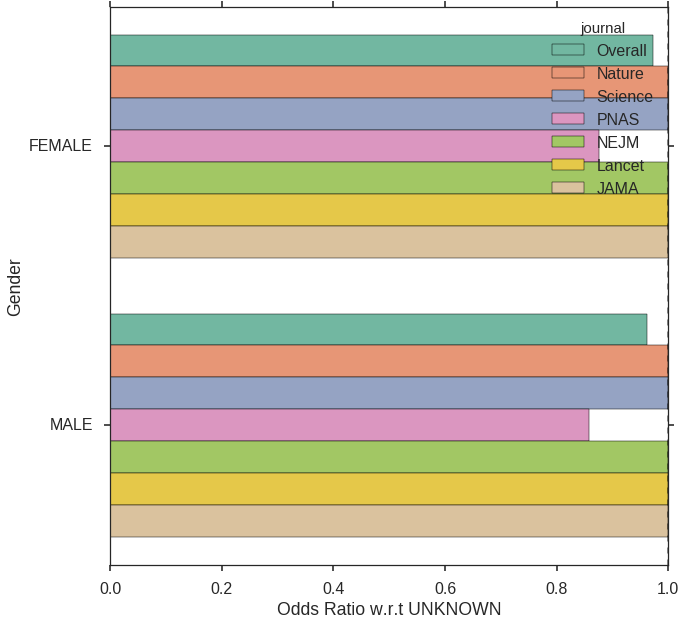

In [13]:
fig, ax = plt.subplots(1,1, sharex=True, figsize=(10,10))
plot_data = pd.DataFrame()
journals = []
GENDER_NAMES = ["UNKNOWN", "FEMALE", "MALE"]
title = "Gender"
for jid, (m, s) in results_full_journal:
    journals.append(jid)
    t = s.tables[1].ix[s.tables[1].index.str.startswith("C(gender"), ["Coef.", "P>|z|"]]
    t.ix[t["P>|z|"] > 0.005, "Coef."] = 0.
    plot_data[jid] = t["Coef."]

#plot_data["Overall"] = [-0.0208, -0.0367]
#journals.append("Overall")
display(plot_data)
        
colors = sns.color_palette("dark", plot_data.shape[0])
colors = ["red", "blue"]
pdata = pd.melt(np.exp(plot_data).reset_index(), id_vars=["index"], value_vars=plot_data.columns.tolist())
pdata.columns = ["index", "journal", "value"]
ax = sns.barplot(data=pdata,
           y="index", x="value", hue="journal",
                palette=sns.color_palette("Set2", 10))
ax.set_yticklabels(GENDER_NAMES[1:])
ax.axvline(1.0, linestyle="--", color="black", alpha=0.5)
ax.set_ylabel("Gender")
ax.set_xlabel("Odds Ratio w.r.t %s" % GENDER_NAMES[0])
plt.savefig("Gender_coeffs.%s.journal.pdf" % MODEL_SUFFIX, bbox_inches="tight")

,Overall,Nature,Science,PNAS,NEJM,Lancet,JAMA
"C(source_country, levels=TOP_15_COUNTRIES)[T.UNKNOWN]",-0.044681,0.000000,0.00000,0.000000,0.000000,-0.322156,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.UK]",0.000000,0.000000,0.00000,0.000000,0.000000,-0.214417,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.JAPAN]",0.266947,0.402285,0.48947,0.369771,0.000000,0.000000,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.GERMANY]",0.023824,0.000000,0.00000,0.000000,0.000000,-0.314245,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.FRANCE]",-0.044255,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.ITALY]",-0.101039,0.000000,0.00000,0.000000,0.441351,-0.412828,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.CANADA]",0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.CHINA]",-0.411998,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.AUSTRALIA]",0.087880,0.000000,0.00000,0.000000,0.666917,0.000000,0.0
"C(source_country, levels=TOP_15_COUNTRIES)[T.SPAIN]",-0.122310,0.000000,0.00000,0.000000,0.000000,0.000000,0.0


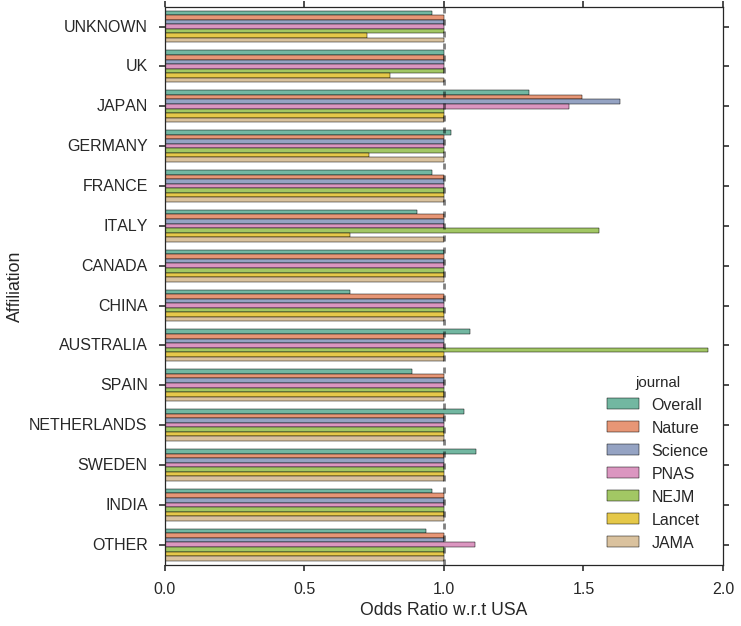

In [14]:
fig, ax = plt.subplots(1,1, sharex=True, figsize=(10,10))
plot_data = pd.DataFrame()
journals = []
title = "Affiliation"
for jid, (m, s) in results_full_journal:
    journals.append(jid)
    t = s.tables[1].ix[s.tables[1].index.str.startswith("C(source_country"), ["Coef.", "P>|z|"]]
    t.ix[t["P>|z|"] > 0.005, "Coef."] = 0.
    plot_data[jid] = t["Coef."]

display(plot_data)
        
pdata = pd.melt(np.exp(plot_data).reset_index(), id_vars=["index"], value_vars=plot_data.columns.tolist())
pdata.columns = ["index", "journal", "value"]
ax = sns.barplot(data=pdata,
           y="index", x="value", hue="journal",
                palette=sns.color_palette("Set2", 10))
ax.set_yticklabels(TOP_15_COUNTRIES[1:])
ax.axvline(1.0, linestyle="--", color="black", alpha=0.5)
ax.set_ylabel("Affiliation")
ax.set_xlabel("Odds Ratio w.r.t %s" % TOP_15_COUNTRIES[0])
plt.savefig("Affiliation_coeffs.%s.journal.pdf" % MODEL_SUFFIX, bbox_inches="tight")

,Overall,Nature,Science,PNAS,NEJM,Lancet,JAMA
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[0]",-0.014260,0.000000,0.0,0.000000,0.000000,0.000000,0.347908
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[1]",0.053126,0.000000,0.0,-0.162200,0.000000,0.257091,0.000000
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[2]",0.045616,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[3]",-0.102108,-0.314729,0.0,-0.271652,0.000000,0.000000,0.000000
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[4]",0.044012,0.000000,0.0,-0.123161,0.541211,0.000000,0.667456
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[5]",-0.074112,0.000000,0.0,-0.142033,0.000000,0.000000,0.000000
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[6]",-0.059458,0.000000,0.0,-0.279292,0.000000,0.000000,0.000000
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[7]",-0.063787,0.000000,0.0,0.000000,0.000000,0.000000,-0.761149
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[8]",0.135495,0.000000,0.0,-0.218991,0.000000,0.000000,0.000000
"mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[9]",-0.054727,0.000000,0.0,0.000000,0.437677,0.000000,0.000000


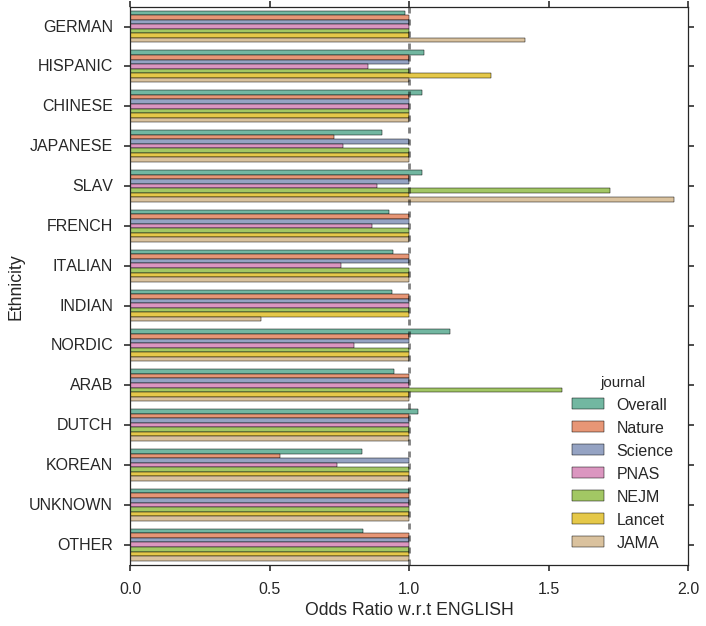

In [15]:
fig, ax = plt.subplots(1,1, sharex=True, figsize=(10,10))
plot_data = pd.DataFrame()
journals = []
title = "Affiliation"
for jid, (m, s) in results_full_journal:
    journals.append(jid)
    t = s.tables[1].ix[s.tables[1].index.str.startswith("mf.MC(eth1"), ["Coef.", "P>|z|"]]
    t.ix[t["P>|z|"] > 0.005, "Coef."] = 0.
    plot_data[jid] = t["Coef."]
    

display(plot_data)
        
colors = sns.color_palette("dark", plot_data.shape[0])
colors = colors = sns.color_palette("dark", plot_data.shape[0])
pdata = pd.melt(np.exp(plot_data).reset_index(), id_vars=["index"], value_vars=plot_data.columns.tolist())
pdata.columns = ["index", "journal", "value"]
ax = sns.barplot(data=pdata,
           y="index", x="value", hue="journal",
                palette=sns.color_palette("Set2", 10))
ax.set_yticklabels(TOP_15_ETHNICITIES[1:])
ax.axvline(1.0, linestyle="--", color="black", alpha=0.5)
ax.set_ylabel("Ethnicity")
ax.set_xlabel("Odds Ratio w.r.t %s" % TOP_15_ETHNICITIES[0])
plt.savefig("Ethnicity_coeffs.%s.journal.pdf" % MODEL_SUFFIX, bbox_inches="tight")